# Mean Encoding

**Definition**
  * Replace the category by the average target value for that category 
    ![](images/mean_encoding_example.png)

**Advantages**
  * Straightforward to implement 
  * Does not expand the feature space 
  * Creates monotonic relationship between categories and target 

**Limitations**
  * May lead to over-fitting
  * Difficult to implement together with cross-validation with current libraries 
  * If 2 categories show the same mean of target --> loss of value 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/house_price/train.csv', 
                 usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

In [3]:
df

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000
...,...,...,...,...
1455,Gilbert,VinylSd,VinylSd,175000
1456,NWAmes,Plywood,Plywood,210000
1457,Crawfor,CemntBd,CmentBd,266500
1458,NAmes,MetalSd,MetalSd,142125


# Split data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df, df['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 4), (438, 4))

# Check monotonicity 

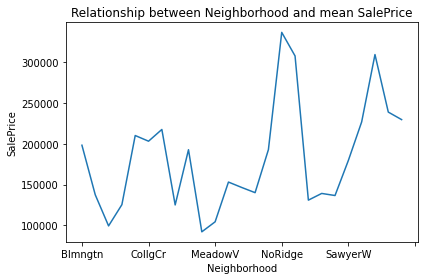

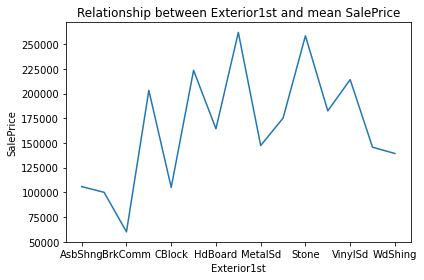

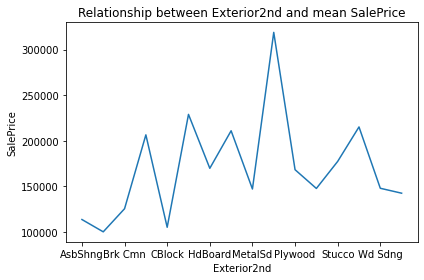

In [5]:
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    fig, ax = plt.subplots()
    X_train.groupby(col)['SalePrice'].mean().plot()
    plt.title(f'Relationship between {col} and mean SalePrice')
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

# Get mean encoding

In [6]:
encoder = {}
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    encoder[col] = X_train.groupby([col])['SalePrice'].mean().to_dict()


In [7]:
encoder

{'Neighborhood': {'Blmngtn': 198164.5,
  'Blueste': 137500.0,
  'BrDale': 99440.0,
  'BrkSide': 125438.41463414633,
  'ClearCr': 210034.66666666666,
  'CollgCr': 203086.37142857144,
  'Crawfor': 217453.91428571427,
  'Edwards': 125082.67605633802,
  'Gilbert': 192662.29090909092,
  'IDOTRR': 92174.16666666667,
  'MeadowV': 104441.66666666667,
  'Mitchel': 153070.44444444444,
  'NAmes': 146435.26490066224,
  'NPkVill': 140107.14285714287,
  'NWAmes': 192788.23529411765,
  'NoRidge': 336264.6666666667,
  'NridgHt': 307418.137254902,
  'OldTown': 130958.32876712328,
  'SWISU': 139154.66666666666,
  'Sawyer': 136596.44262295082,
  'SawyerW': 179463.0888888889,
  'Somerst': 226644.19642857142,
  'StoneBr': 309105.9375,
  'Timber': 238700.1,
  'Veenker': 229500.0},
 'Exterior1st': {'AsbShng': 105814.06666666667,
  'AsphShn': 100000.0,
  'BrkComm': 60000.0,
  'BrkFace': 203255.7142857143,
  'CBlock': 105000.0,
  'CemntBd': 223548.92307692306,
  'HdBoard': 164371.2026143791,
  'ImStucc': 26200

# Transform

In [8]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
64,CollgCr,VinylSd,VinylSd,219500
682,ClearCr,Wd Sdng,Wd Sdng,173000
960,BrkSide,Wd Sdng,Plywood,116500
1384,Edwards,WdShing,Wd Shng,105000
1100,SWISU,Wd Sdng,Wd Sdng,60000


In [9]:
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    X_train[col] = X_train[col].map(encoder[col])

/Users/minkyung/.local/share/virtualenvs/feature-engineering-ZjNb4T9G/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
64,203086.371429,214153.145604,215165.045326,219500
682,210034.666667,145688.885135,147822.218310,173000
960,125438.414634,145688.885135,168211.133929,116500
1384,125082.676056,139342.000000,142417.241379,105000
1100,139154.666667,145688.885135,147822.218310,60000


# Check monotonicity 

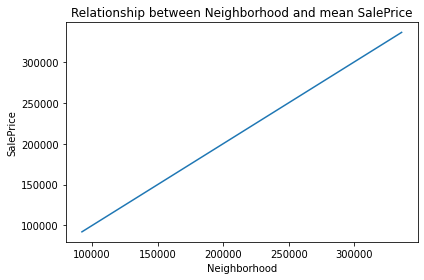

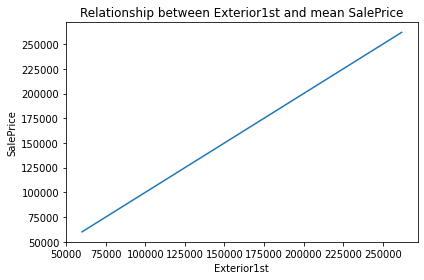

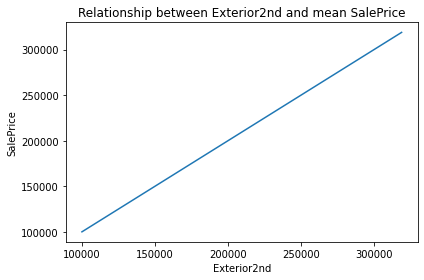

In [11]:
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    fig, ax = plt.subplots()
    X_train.groupby(col)['SalePrice'].mean().plot()
    plt.title(f'Relationship between {col} and mean SalePrice')
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()